In [4]:
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import v2
import torch


IMAGES_PATH = "Tennis Player Actions Dataset for Human Pose Estimation/images"
DATA_SPLIT = [0.8, 0.1, 0.1]
BATCH_SIZE = 32 
initial_transform = v2.Compose([
    v2.ToImage(),
    v2.Resize((720, 1280)),
])


full_dataset = datasets.ImageFolder(root=IMAGES_PATH, transform=initial_transform)
generator = torch.Generator().manual_seed(42)
train_dataset, test_dataset, val_dataset = random_split(full_dataset, DATA_SPLIT, generator=generator)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

print("-"*5, "Number of samples", "-"*5)
print("Training:", len(train_dataset))
print("Testing:", len(test_dataset))
print("Validation:", len(val_dataset))

----- Number of samples -----
Training: 1600
Testing: 200
Validation: 200


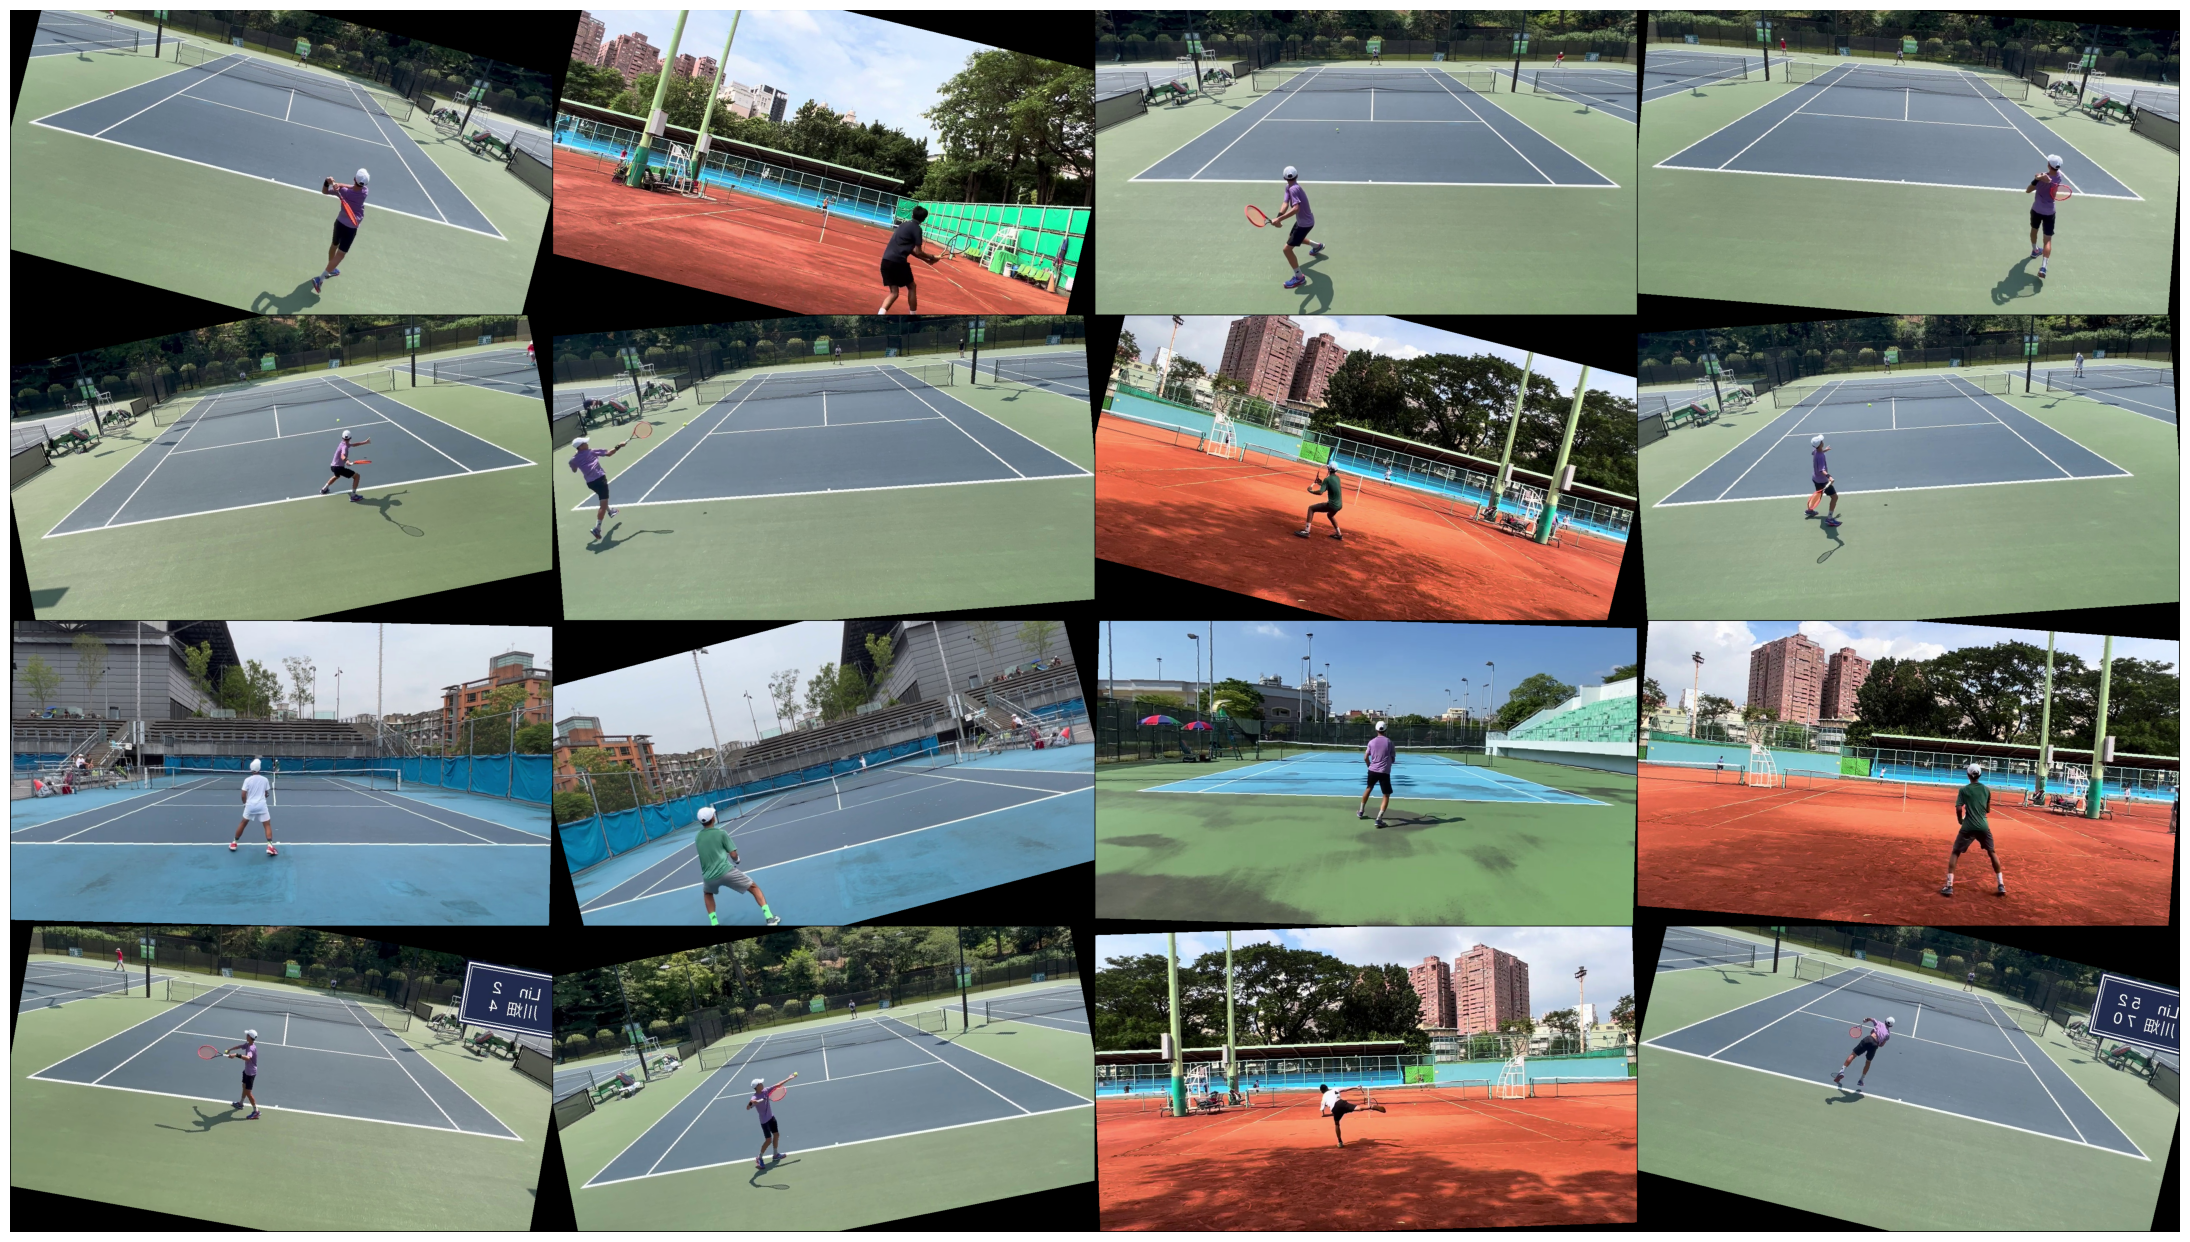

Grid labels: ['backhand', 'backhand', 'backhand', 'backhand', 'forehand', 'forehand', 'forehand', 'forehand', 'ready_position', 'ready_position', 'ready_position', 'ready_position', 'serve', 'serve', 'serve', 'serve']


In [35]:
import matplotlib.pyplot as plt
import torchvision
import torch
from PIL import Image

def show_grid(img_tensors, titles=None, ncols=2):
    # img_tensors: list of CHW tensors (0..1)
    grid = torchvision.utils.make_grid(img_tensors, nrow=ncols, padding=2)
    npimg = grid.permute(1,2,0).numpy()
    plt.figure(figsize=(7*4,12*ncols))
    plt.imshow(npimg)
    plt.axis('off')
    if titles:
        # optional: titles not supported per-tile in this simple grid
        pass
    plt.show()

# pick N random examples per class (resized by the transform defined earlier)
N = 4
all_examples = []
labels = []
for lbl in range(len(dataset.classes)):
    paths = [p for p,l in dataset.samples if l == lbl]
    chosen = random.sample(paths, min(N, len(paths)))
    for p in chosen:
        # load with same transform used in ds
        pil = Image.open(p).convert("RGB")
        t = transform(pil)     # CHW tensor
        all_examples.append(t)
        labels.append(dataset.classes[lbl])

show_grid(all_examples, ncols=N)
# Optionally print labels in same order as grid:
print("Grid labels:", labels)